 ## GP 6

 **Group Members:**  
 - Tattah Abel Mawunyo 11335775
 - Member 2: Name (Index Number)  
 - Member 3: Name (Index Number)  
 - Member 4: Name (Index Number)  

 ## RSA Brute Force Timing Experiment

 In this notebook we explore the complexity of the RSA algorithm by attempting to
 compute the private key \( d \) (where \( d \) is the modular inverse of \( e \) modulo \(\phi(n)\)) via brute force.

 For a given RSA system with public key \( \{ e, n \} \) (with \( n = p \times q \)),
 \( d \) satisfies:

 \[
 d \times e \equiv 1 \pmod{\phi(n)}
 \]

 We first test the case with small primes \( p = 43, q = 59, e = 13 \), and then evaluate
 the time taken to “find” \( d \) by brute force for:

 - Two four-digit primes
 - Two six-digit primes
 - Two eight-digit primes
 - Two ten-digit primes

 For large primes, the brute force method is extremely slow. Hence, we will measure the speed
 of our iteration loop for a fixed number of iterations and then extrapolate the total time
 required to reach \( d \).

In [1]:

import time
import math
import matplotlib.pyplot as plt


## Helper Functions

We start by defining helper functions: a simple primality test, the greatest common divisor,
the Extended Euclidean Algorithm (to quickly compute the modular inverse), and a brute-force method
(or its time extrapolation) for finding \( d \).


In [3]:

def is_prime(n):
    """Return True if n is prime (simple trial division)."""
    if n < 2:
        return False
    if n in (2,3):
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(math.sqrt(n))+1, 2):
        if n % i == 0:
            return False
    return True

def gcd(a, b):
    """Compute the greatest common divisor using Euclid's algorithm."""
    while b:
        a, b = b, a % b
    return a

def extended_gcd(a, b):
    """Return tuple (g, x, y) such that ax + by = g = gcd(a, b)."""
    if a == 0:
        return (b, 0, 1)
    else:
        g, x, y = extended_gcd(b % a, a)
        return (g, y - (b // a) * x, x)

def modinv(e, phi):
    """Compute the modular inverse of e mod phi using the Extended Euclidean Algorithm."""
    g, x, _ = extended_gcd(e, phi)
    if g != 1:
        raise Exception('Modular inverse does not exist')
    else:
        return x % phi



## Brute-Force Search for d

This function tries to find \( d \) by checking every candidate \( k \) (starting from 1) until
it finds one such that:

\[
k \times e \mod \phi = 1.
\]

For small \( d \), we run the loop and measure the actual time. For large \( d \), we measure
the speed of our loop (iterations per second) using a fixed number of iterations and then
estimate the total time.



In [4]:

def brute_force_d(p, q, e, max_iter_for_real=10**6):
    """
    For given primes p and q and public exponent e,
    compute phi, then find d (the modular inverse of e modulo phi)
    by brute force. For large d (when the actual loop would be too long),
    we extrapolate the time using a measurement of iterations per second.
    Returns (d, time_taken, method) where method is either "actual" or "extrapolated".
    """
    phi = (p-1) * (q-1)
    # First, compute d quickly using modinv (for later reference)
    d_true = modinv(e, phi)

    # If d_true is small enough, try actual brute force search.
    if d_true < max_iter_for_real:
        start = time.time()
        candidate = 1
        while candidate < d_true+1:
            if (candidate * e) % phi == 1:
                d = candidate
                break
            candidate += 1
        elapsed = time.time() - start
        return d, elapsed, "actual"
    else:
        # For large d, measure iterations per second over a fixed number of iterations.
        test_iters = 10**5  # number of iterations to measure speed
        start = time.time()
        dummy = 0
        for i in range(test_iters):
            dummy += 1  # dummy operation
        test_time = time.time() - start
        iter_rate = test_iters / test_time

        # Extrapolate total time required to reach d_true iterations
        estimated_time = d_true / iter_rate
        return d_true, estimated_time, "extrapolated"


## Testing on the Small Example (p=43, q=59, e=13)

This test should complete quickly using the brute force search method.

Test parameters: p = 43, q = 59, e = 13



In [6]:

p_small, q_small, e_small = 43, 59, 13
d_found, time_taken, method = brute_force_d(p_small, q_small, e_small)
print(f"Small example (p={p_small}, q={q_small}, e={e_small}):")
print(f"  d = {d_found} (computed by {method} method)")
print(f"  Time taken: {time_taken:.6f} seconds")



Small example (p=43, q=59, e=13):
  d = 937 (computed by actual method)
  Time taken: 0.000268 seconds


## Experiment: Brute-Force Timing for Different Prime Sizes

We use the following pairs:

- **Four-digit primes:** 1009, 1013  
- **Six-digit primes:** 100003, 100019  
- **Eight-digit primes:** 10000019, 10000079  
- **Ten-digit primes:** 1000000007, 1000000009  

We use \( e = 13 \) (which is prime) for all cases.

For each pair, we record the number of digits (using the digit length of \( p \)) and the time
(or estimated time) required to find \( d \) by brute force.

Define the prime pairs and corresponding label (digit-length)



In [7]:

prime_pairs = {
    "4-digit": (1009, 1013),
    "6-digit": (100003, 100019),
    "8-digit": (10000019, 10000079),
    "10-digit": (1000000007, 1000000009)
}

e_val = 13
results = {}

print("Brute-force timing results (d computation):")
for label, (p_val, q_val) in prime_pairs.items():
    print(f"\nTesting for {label} primes: p = {p_val}, q = {q_val}")
    d_val, t_val, method_used = brute_force_d(p_val, q_val, e_val)
    results[label] = t_val
    # For very long estimated times, we convert seconds to a larger unit
    if t_val > 3600:
        print(f"  Estimated time: {t_val:.2e} seconds (~{t_val/3600:.2e} hours) [{method_used}]")
    else:
        print(f"  Time taken: {t_val:.6f} seconds [{method_used}]")



Brute-force timing results (d computation):

Testing for 4-digit primes: p = 1009, q = 1013
  Time taken: 0.015589 seconds [actual]

Testing for 6-digit primes: p = 100003, q = 100019
  Time taken: 161.415980 seconds [extrapolated]

Testing for 8-digit primes: p = 10000019, q = 10000079
  Estimated time: 3.04e+06 seconds (~8.46e+02 hours) [extrapolated]

Testing for 10-digit primes: p = 1000000007, q = 1000000009
  Estimated time: 2.75e+10 seconds (~7.64e+06 hours) [extrapolated]


## Plotting the Results

We plot the measured/estimated times versus the prime size (by the number of digits).
If the time differences are large, we use a logarithmic scale on the y-axis.

Prepare data for plotting



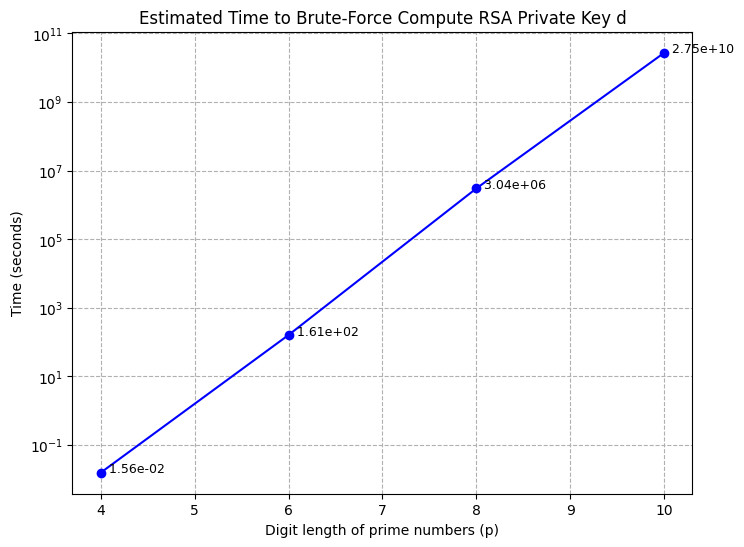

In [8]:

sizes = []
times = []
for label in results:
    # extract digit count from the label (e.g., "4-digit" -> 4)
    digit_count = int(label.split("-")[0])
    sizes.append(digit_count)
    times.append(results[label])

plt.figure(figsize=(8, 6))
plt.plot(sizes, times, marker='o', linestyle='-', color='blue')
plt.xlabel("Digit length of prime numbers (p)")
plt.ylabel("Time (seconds)")
plt.title("Estimated Time to Brute-Force Compute RSA Private Key d")
plt.yscale('log')  # use logarithmic scale if time differences are large
plt.grid(True, which="both", ls="--")
for x, y in zip(sizes, times):
    plt.text(x, y, f"  {y:.2e}", fontsize=9)
plt.show()




## Conclusion

The experiment illustrates that even for modest increases in the prime sizes, the brute-force method
for finding the RSA private key \( d \) becomes extremely time‐consuming. While a brute-force approach
may work for small primes, the enormous search space for large primes (which are used in practical RSA)
makes this approach computationally infeasible. This underscores the strength of RSA and the importance
of efficient algorithms (such as the Extended Euclidean Algorithm) for computing modular inverses.
